BY AYUSH N. NAGDIVE

## Project Overview

This project aims to **predict loan approval** by analyzing applicant details such as **loan amount, tenure, CIBIL score, education, income, and assets**. It helps identify **key factors affecting loan approval** and allows prediction of **loan status for new applicants**, enabling better prioritization of applicants likely to get approved.

### Dataset

The dataset contains applicant **financial and personal information** including **CIBIL score, income, employment, loan details, asset values, and loan status**. It is used to build **machine learning models** to predict the likelihood of loan approval.

**Dataset Link:** [Loan Approval Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)

In [70]:
import os

In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
os.getcwd()

'C:\\Users\\user\\OneDrive\\Attachments\\Desktop\\DataSets'

In [73]:
os.chdir('C:\\Users\\user\\OneDrive\\Attachments\\Desktop\\DataSets')

In [74]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [75]:
# Checking the shape of the dataset
df.shape

(4269, 13)

In [76]:
df.drop(columns='loan_id', inplace=True)

In [77]:
# Checking for null/missing values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [78]:
# Checking the data types of the columns
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

The dataset includes four types of assets: Residential, Commercial, Luxury, and Bank.
I’ve grouped these assets into two main categories — **Movable** and **Immovable**:

* **Residential** and **Commercial** assets fall under **Immovable assets**.
* **Luxury** and **Bank** assets fall under **Movable assets**.


In [79]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [80]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [81]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [82]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


## Exploratory Data Analysis

In the data analysis, I will first look at how the data is spread out for each variable. Then, I’ll check how the input variables are related to the target variable, and also see how all the variables are connected to each other.

By using charts and graphs, I’ll be able to spot patterns, trends, and discover useful insights that are not easy to see just by looking at the raw data.

#### Number of Dependents

Text(0.5, 1.0, 'Number of Dependents')

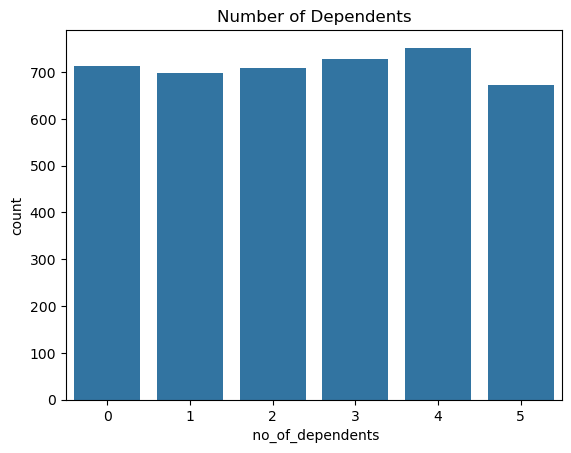

In [83]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

This graph shows how many people depend on each loan applicant. The numbers are fairly close, but more applicants have 3 or 4 dependents compared to others.

When someone has more dependents, they have less money left over after expenses. So, I think people with 0 or 1 dependent are more likely to get their loans approved.

#### Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

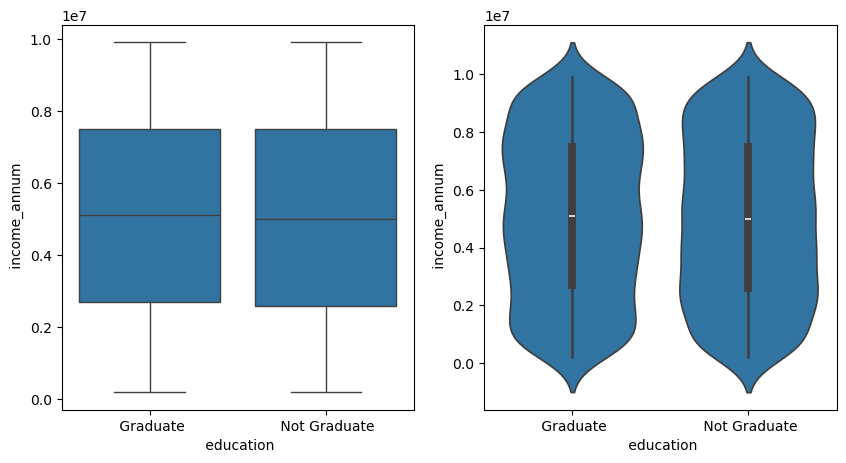

In [86]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

* Two graphs (boxplot and violin plot) show the link between education level and yearly income.

* The **boxplot** shows that:

  * Graduates and non-graduates have almost the same **average (median) income**.
  * Graduates earn just a little more.

* The **violin plot** shows that:

  * Non-graduates have a **more even spread** of income between 2,000,000 and 8,000,000.
  * Graduates have **more people earning between 6,000,000 and 8,000,000**, but the spread is uneven.

* Based on this, education level **doesn’t seem to make a big difference** in income.

* So, education may **not be a major factor** in getting a loan approved.


#### Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

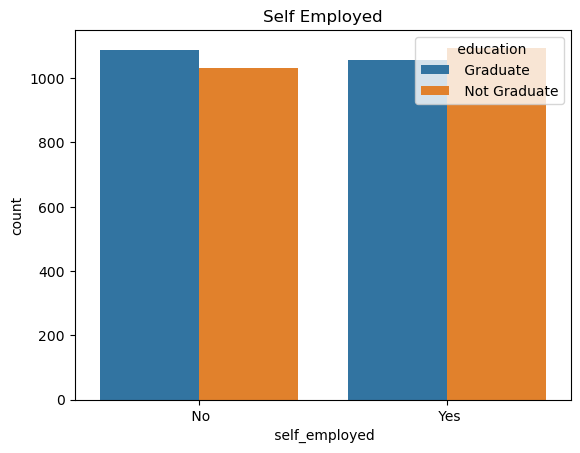

In [87]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')


* The graph compares **self-employed applicants** based on their **education level**.
* Most **graduates** are **salaried employees**, while most **non-graduates** are **self-employed**.
* **Salaried employees** generally have a **stable income**, making them **more reliable** for loan repayment.
* However, some **self-employed applicants** may earn **more** and can also **repay loans effectively**.
* Thus, **education and employment type** are **key factors** in **loan approval decisions**.


#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

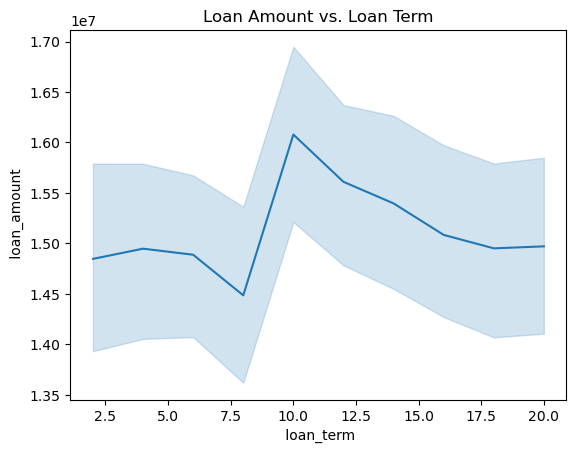

In [88]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

* The line plot shows the **relationship between loan amount and loan tenure**.
* For loan tenures between **2.5 and 7.5 years**, the **loan amount** ranges from **1,400,000 to 1,550,000**.
* The **loan amount increases significantly** for a **10-year tenure**, indicating that longer tenures are generally associated with **higher loan amounts**.

#### CIBIL Score Distribution


<Axes: xlabel=' cibil_score', ylabel='Count'>

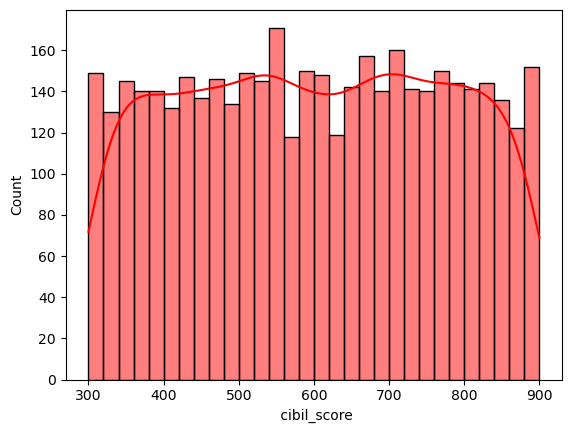

In [89]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

Before analyzing the CIBIL scores, it is important to understand their ranges and meanings:

* **300–549:** Poor – High risk of default.
* **550–649:** Fair – Moderate risk; improvement needed.
* **650–749:** Good – Generally reliable borrower.
* **750–799:** Very Good – Low risk; likely to get loan approval.
* **800–900:** Excellent – Very low risk; highly creditworthy.

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

#### Asset Distribution


<Axes: xlabel='Immovable_assets', ylabel='Count'>

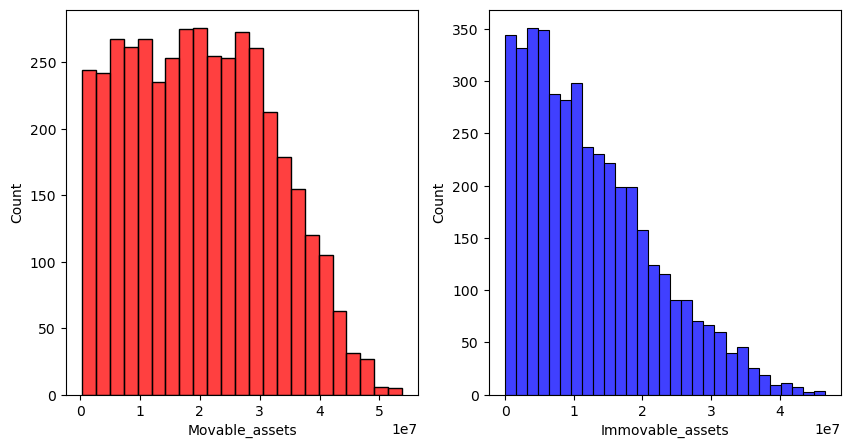

In [90]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

* **Assets** are important in loan applications as they provide **security to the bank**.
* Assets are categorized into:

  * **Movable assets:** Bank assets and luxury items
  * **Immovable assets:** Residential and commercial properties
* **Movable assets:**

  * Most applicants have **less than 30 million**.
  * The number of applicants **slightly decreases** as movable assets increase.
* **Immovable assets:**

  * Most applicants have **less than 15 million**.
  * The number of applicants **drops significantly** for assets above 20 million.

* So far in the EDA, I have explored the **distribution of data** across various features and the **relationships between some variables**, forming **assumptions and hypotheses**.
* Next, I will **visualize the relationship** between the **independent variables** and the **target variable** to **test and validate** these assumptions.


#### Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

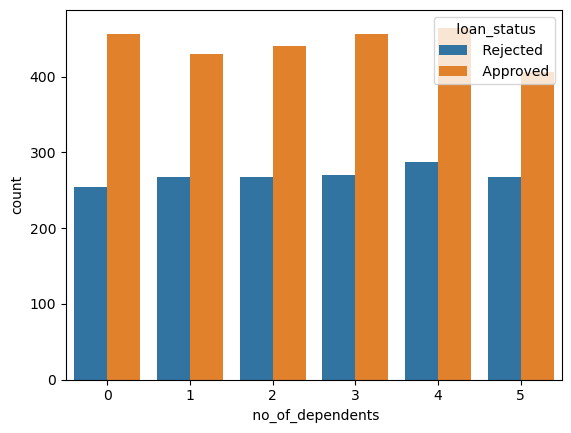

In [91]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

* Hypothesis: More dependents → lower loan approval, higher rejection.
* Observation: Rejections slightly increase, but approvals show **no significant change**.
* **Conclusion:** Hypothesis on loan approval vs. dependents is **not true**.

#### Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

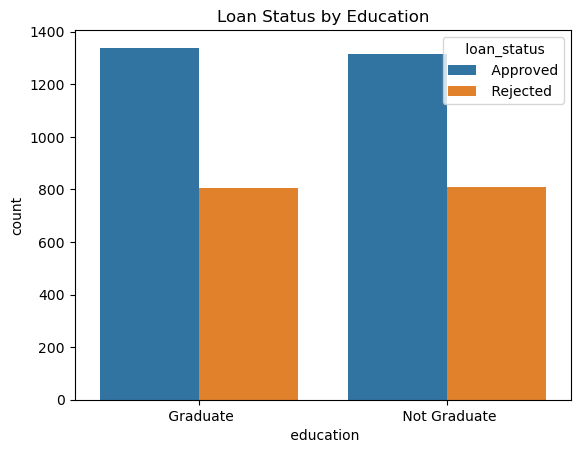

In [92]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

* Hypothesis: Education does **not significantly affect** loan approval.
* Observation: Loan approval and rejection counts for **graduates and non-graduates** show only **minor differences**.
* **Conclusion:** Hypothesis is **correct**.

#### Annual Income vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

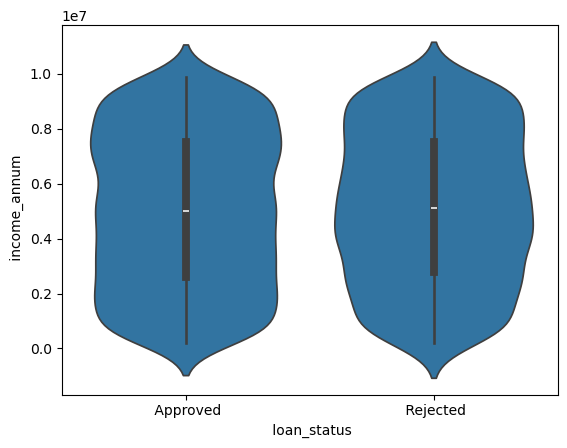

In [93]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

* Overall, there is **no major difference** in annual income between approved and rejected loan applicants.
* However, **approved applicants tend to have slightly higher incomes**, with a noticeable density around **8 million**, as shown in the violin plot.

#### Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

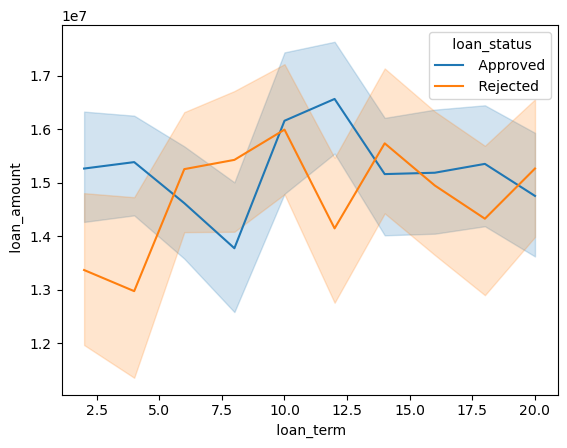

In [94]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

* The graph shows the relationship between **loan amount, loan tenure, and loan status**.
* **Approved loans** generally have **higher amounts** and **shorter tenures**.
* **Rejected loans** often have **lower amounts** and **longer tenures**, possibly due to **bank policies** favoring profitability and shorter repayment periods.

#### CIBIL Score Vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

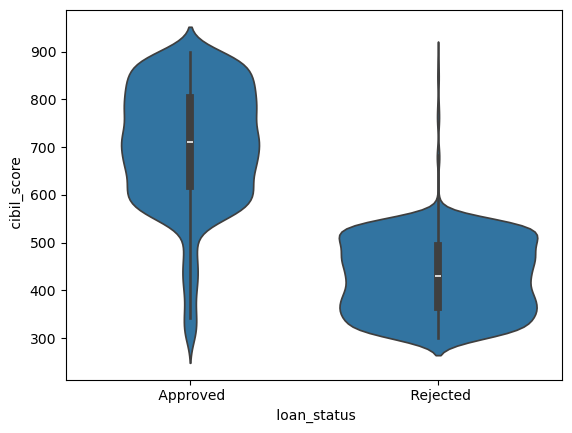

In [95]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

* Hypothesis: **Higher CIBIL score → higher chance of loan approval**.
* Observation from the violin plot:

  * **Approved loans** cluster above **600**.
  * **Rejected loans** are more spread out, mostly below **550**.
* **Conclusion:** A **CIBIL score above 600** significantly increases the likelihood of loan approval.

 #### Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

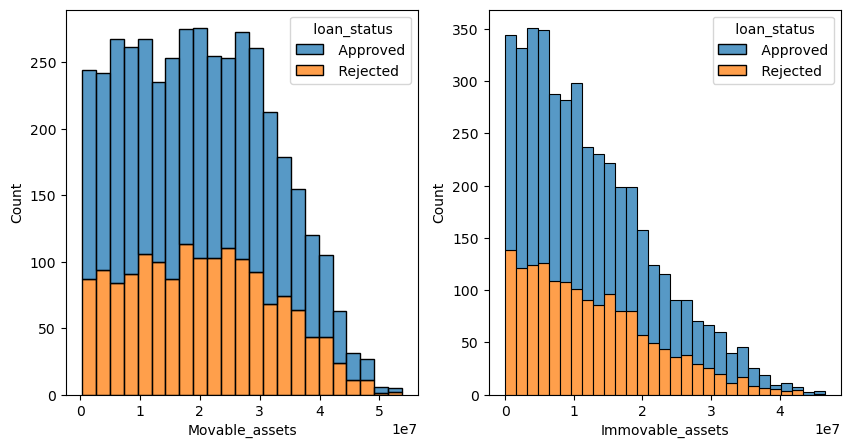

In [96]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

* Assets provide **security to the bank** for the loan.
* Graphs show the relationship between **movable and immovable assets** and **loan status**.
* Observation: As **assets increase**, **loan approval rises** and **rejection decreases**.
* **Movable assets** are generally higher than **immovable assets**.

## Data Preprocessing 2

#### Label Encoding the categorical variables

In [97]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [98]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


## Coorelation Matrix Heatmap

<Axes: >

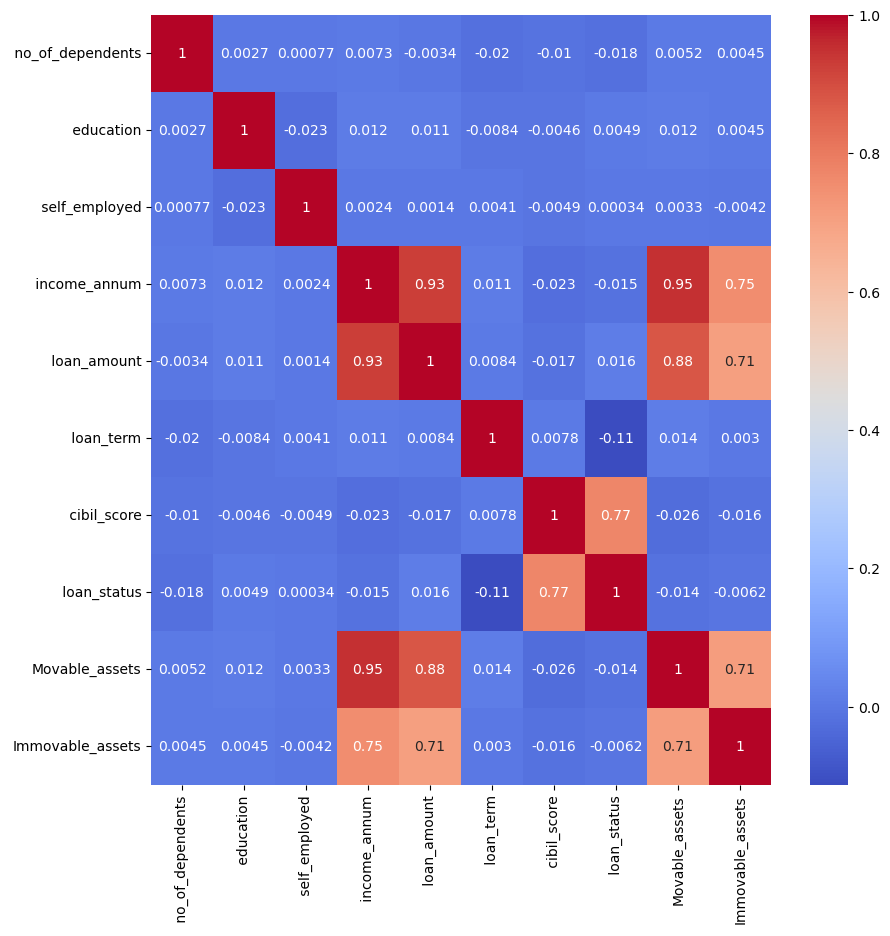

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

* Strong correlations observed between:

  * **Movable & immovable assets**, **income & assets**, **loan amount & income**, and **loan status & CIBIL score**.
* Higher **income** generally means **higher assets**, and assets in one category often imply assets in the other.



* Next, I will explore the **correlation between assets and loan amount** and **income and loan amount**.
* The **relationship between loan status and CIBIL score** has already been analyzed.


#### Assets Vs Loan Amount


Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

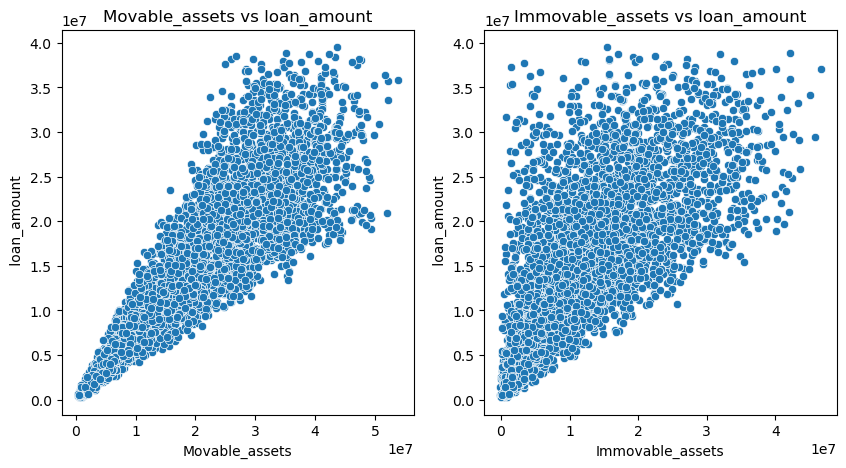

In [100]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

* **Loan amount** has a **positive relationship** with both **movable and immovable assets**.
* Applicants with **more assets** tend to receive **higher loan amounts**.


#### Loan Amount Vs Income

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

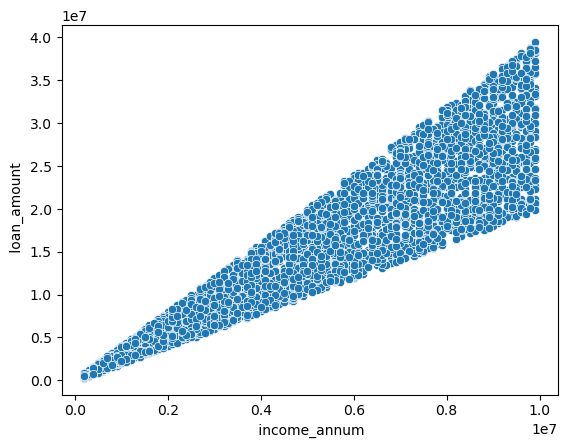

In [101]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

* **Loan amount** is **directly related** to the applicant's **annual income**.
* Higher income generally leads to a **higher loan amount**, as income is a key factor in determining loan eligibility.

## Train Test Split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following machine learning models to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier

#### Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [104]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [106]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

#### Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [108]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [110]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

## Model Evalution

#### Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

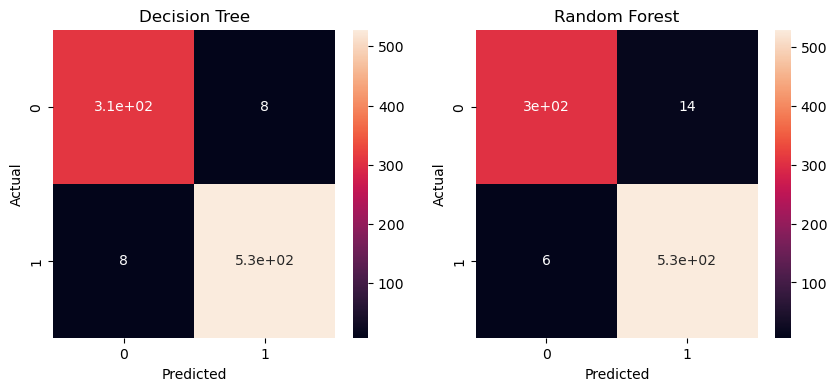

In [111]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

* The confusion matrix shows **true positives and true negatives** for both models.
* **Decision Tree**: 17 false positives/negatives.
* **Random Forest**: 21 false positives/negatives.
* **Conclusion:** Decision Tree has **higher accuracy** than Random Forest.

#### Classification Report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9198347883225382
Mean Squared Error:  0.01873536299765808
Mean Absolute Error:  0.01873536299765808


R2 score:  0.8997934854031728
Mean Squared Error:  0.0234192037470726
Mean Absolute Error:  0.0234192037470726


From all the above metrics, graphs and reports, I conclude that descision tree classifier is a better machine learning model to predict the loan approval status of a person.

## Conclusion

* **Key factors for loan approval:**

  * **CIBIL Score:** Higher scores increase approval chances.
  * **Number of Dependents:** More dependents reduce approval chances.
  * **Assets:** More movable and immovable assets increase approval chances.
  * **Loan Amount & Tenure:** Higher loan amounts with shorter tenures are more likely to be approved.

* **Machine Learning Models:**

  * **Decision Tree Classifier:** 91.4% accuracy
  * **Random Forest Classifier:** 89.4% accuracy
  * **Conclusion:** Decision Tree performed **better** than Random Forest.

----------------------------------END-----------------------------------